In [1]:
# vscode에서 실행시 
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
import tensorflow as tf

print("Keras:", keras.__version__)
print("TensorFlow:", tf.__version__)
print("Backend:", keras.config.backend())
	

2025-11-18 09:17:21.952577: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-18 09:17:21.963016: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-18 09:17:22.058061: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-18 09:17:22.141942: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763425042.234310    1079 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763425042.25

Keras: 3.8.0
TensorFlow: 2.18.0
Backend: tensorflow


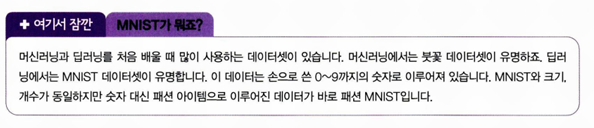

In [2]:
# 케라스를 사용해 패션 MNIST 데이터셋 불러오기
# load_data() : 훈련 데이터와 테스트 데이터를 나누어 반환
import keras
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

In [3]:
# 데이터 크기 확인
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


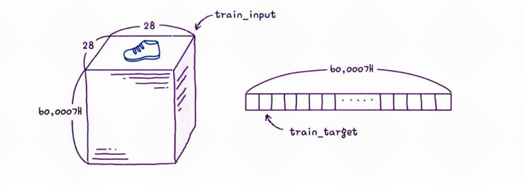

In [4]:
# 테스트 세트 크기 확인
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


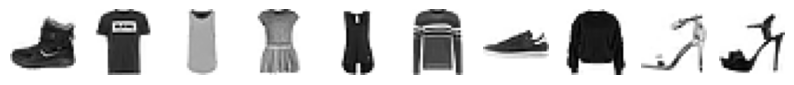

In [5]:
# 훈련 데이터에서 몇 개의 샘플을 그림으로 출력
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i],cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [6]:
# 슬라이싱 연산자를 사용해서 처음 10개 샘플의 타깃값 확인
print(train_target[:10])

[9 0 0 3 0 2 7 2 5 5]


* 패션 MNIST의 타깃은 0〜9까지의 숫자 레이블로 구성
* 패션 MNIST에 포함된 10개 레이블의 의미는 다음과 같음

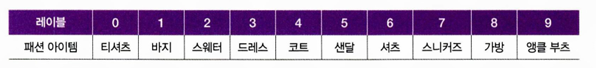

In [7]:
# 넘파이 unique() 함수로 레이블 당 샘플 개수 확인
import numpy as np
print(np.unique(train_target, return_counts=True))


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


#### 로지스틱 회귀로 패션 아이템 분류

In [ ]:
# 훈련 샘플이 60,000개나 되기 때문에 전체 데이터를 한꺼번에 사용하여 모델을 훈련하는 것보다 샘플을 하나씩 꺼내서 모델을 훈련하는 방법이 더 효율적 -> 확률적 경사 하강법
# 확률적 경사 하강법은 여러 특성 중 기울기가 가장 가파른 방향을 따라 이동 -> 표준화 해야함!
# 이미지의 경우 보통 255로 나누어 0〜1 사이의 값으로 정규화 (각 픽셀은 0〜255 사이의 정숫값을 가짐)
train_scaled = train_input/255.0
# SGDClassifier는 2차원 입력을 다루지 못하기 때문에 각 샘플을 1차원 배열로 변환
train_scaled = train_scaled.reshape(-1, 28*28)
# reshape() 메서드의 두 번째 매개변수를 28 * 28 이미지 크기에 맞게 지정하면 첫 번째 차원(샘플 개수)은 변하지 않고 원본 데이터의 두 번째, 세 번째 차원이 1차원으로 합쳐짐
print(train_scaled.shape)

(60000, 784)


In [ ]:
# 교차검증으로 성능 확인
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

/home/min/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/min/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/min/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/min/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve th

0.8194166666666666
